In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
sns.set()
sns.set_style("darkgrid")

# Welcome to Machine Learning - Week 3
Instructor - Daniel Wiesenfeld

**Today's Lecture:**
- A Deeper Look at Linear Regressions
- Solving Linear Regression with Linear Algebra
- Linear Regression Variants
- Logistic Regression
- Gradient Descent

## A Deeper Look at Regression
- While often viewed as a simplistic "Statistics" model, Linear Regression is a fundamental building block of deep learning
- It's important to understand fundamentally what Linear Regression assumes, what it does, how it does it, and how to beef it up
- It's also important to understand what it doesn't do.

### What Does Linear Regression NOT do?

- It's tempting to say that linear regression finds the line (or the equation of the line) that best fits the data points.
- Bit this is NOT true!
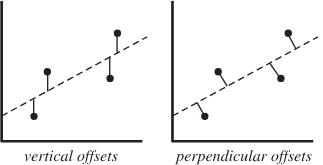
source: https://mathworld.wolfram.com/LeastSquaresFittingPerpendicularOffsets.html
- The image on the right shows an illustration of a line that minimizes the distance between the line and each point. This is what the best fitting line would be. (This is also known as orthogonal regression)
- The image on the left is what linear regression actually does. It minimizes the distance of the line to the points **along the y axis**
- More precisely, it minimizes the sum of the squares of the distances along the y axis. Which is why you may hear this algorithm referred to as Least Squares Regression, or Ordinary Least Squares Regression

Why do you think this is?

### What Does Linear Regression Assume?

Linear Regression assumes that your $y$ vector was generates by a very specific stochastic process:

$$ y = X\beta + r, r \sim \mathcal{N}(0, \sigma^2),$$ 

where $\mathcal{N}(0, \sigma^2)$ is a normal distribution with mean $0$ and variance $\sigma^2$ (Also, we're assuming that a column of $X$ is all $1$'s)

Essentially, it is saying that y is a linear function of $X$ plus some random residual (error) that is normally distributed with a mean of 0 and a standard deviation of $\sigma$. Each residual element is an i.i.d. random variable and cannot be predicted by $X$

Formally, we say that linear regression assumes four things:
1. Linearity (y is a linear function of X plus an error)
2. Homoskedasticity (The variance of the error is constant for each observation of X)
3. Independence (Each observation of X is independent of each other)
4. Normality (the value of y is normally distributed for At any X observation)

In practice, the field of statistics is much more concerne than the field of ML regarding violating these assumptions. The goal in ML is to generate generalizable predictions. We test for that using cross validation and test sets. That said, understanding this and dealing with it can help you develop a better model.

### What Does Linear Regression Do?
- Linear regression tries to find $\hat\beta$ (estimated values of the true coefficients of a linear function) that minimize the square of the sum of $r$ given the data (Known as RSS)
$$\hat\beta = \text{arg min}_\hat\beta \quad \|X\hat\beta - y\|^2_2$$
- In doing so it also minimizes $\hat\sigma^2$
- $\hat\sigma$ is sometimes referred to as $s$ and $\hat\beta$ i sometimes referenced as $b$

### How Does It Do That?

Multiple ways!
- Mathematically: By solving $\hat\beta = (X^\top X)^{-1}X^\top y $
- Iteratively through various algorithms, such as gradient descent or coordinate descent

### Let's test out a few versions of prediction with regression models

Let's try this with some financial data where we'll try predict an unemployment rates
(Note: this data was gathered quarterly, but we're purposely ignoring the time series element to just see if we can predict unemployment given other concurrent financial metrics)

In [2]:
from statsmodels.api import OLS, datasets, add_constant
#df = pd.DataFrame(datasets.macrodata.load().data)[['realgdp', 'realcons', 'realgovt', 'realdpi', 'cpi', 'm1', 'pop', 'unemp']]
df = pd.DataFrame(datasets.macrodata.load().data).drop(columns = ['year', 'quarter', ])
df

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
198,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


Let's split to train and test sets

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'unemp').pipe(add_constant), 
                                                    df['unemp'], test_size = 0.2, random_state = 36)

### Linear Regression With Linear Algebra

In [5]:
b = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
b.index = X_train.columns
b

const      -19.732452
realgdp     -0.011257
realcons     0.008199
realinv     -0.000286
realgovt    -0.002562
realdpi      0.002813
cpi          0.088898
m1          -0.004693
tbilrate     0.099137
pop          0.202246
infl        -0.159362
realint     -0.166410
dtype: float64

### Linear Regression with Sklearn

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = False)
reg.fit(X_train, y_train)
b = pd.Series(reg.coef_)
b.index = X_train.columns
b

const      -19.732452
realgdp     -0.011257
realcons     0.008199
realinv     -0.000286
realgovt    -0.002562
realdpi      0.002813
cpi          0.088898
m1          -0.004693
tbilrate     0.099137
pop          0.202246
infl        -0.159362
realint     -0.166410
dtype: float64

## Regression Variants

### Now let's try some cross validation to compare these results with other versions of regression

Let's start by standardizing the features

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trn_sc = scaler.fit_transform(np.array(X_train.iloc[:, 1:]))
X_tst_sc = scaler.transform(np.array(X_test.iloc[:, 1:]))

Now let's reapply OLS on the standardized features, and look at the cross validation score

In [8]:
from sklearn.model_selection import cross_val_score
from cross_val import CV
reg = LinearRegression()
cvreg = CV(k=5, model = reg, random_seed = 36)
reg_cv_scores = cvreg.fit(X_trn_sc, y_train).scores
reg_train_score = cvreg.score(X_trn_sc, y_train)
reg_test_score = cvreg.score(X_tst_sc, y_test)
print(f"train_score={reg_train_score}")
print(f"cross_val_scores={reg_cv_scores}")
print(f"mean_cross_val_scores={np.mean(reg_cv_scores)}, stdev_cross_val_score={np.std(reg_cv_scores)}")
print(f"test_score={reg_test_score}")
print(f"coefs={cvreg.model.coef_}")

train_score=0.8824059787026652
cross_val_scores=[0.8306709190535582, 0.9131451502050763, 0.9132103439658548, 0.3749813724434222, 0.7013544794251274]
mean_cross_val_scores=0.7466724530186079, stdev_cross_val_score=0.2013513091269525
test_score=0.8536076220172343
coefs=[-36.85508058  19.33669223  -0.17191362  -0.35833105   6.94822184
   5.50849037  -2.15546414   0.26863927   7.69243432  -0.51462923
  -0.45229842]


There seems to be some overfitting going on (training vs CV results) as well as possibly some evidence that LR might not be the right model structure at all.

Let's try to regularize the coefficients

### Ridge Regression

- Ridge regression attempts to reduce variance by penalizing the RSS with the L2 norm of the coefficients:
$$\text{arg min}_\beta \quad \|X\beta - y\|^2_2 + \alpha \|\beta\|^2_2$$
- $\alpha$ is determined before fitting the model, the greater $\alpha$, the greater the penalty
- We can find a good $\alpha$ by using cross validation

In [9]:
from sklearn.linear_model import RidgeCV, Ridge
rcvreg = RidgeCV(alphas = [0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 200])
rcvreg.fit(X_trn_sc, y_train)
rreg = Ridge(alpha=rcvreg.alpha_)
cvrreg = CV(k=5, model = rreg, random_seed = 36)
rreg_cv_scores = cvrreg.fit(X_trn_sc, y_train).scores
rreg_train_score = cvrreg.score(X_trn_sc, y_train)
rreg_test_score = cvrreg.score(X_tst_sc, y_test)
print(f"alpha={rcvreg.alpha_}")
print(f"train_score={rreg_train_score}")
print(f"cross_val_scores={rreg_cv_scores}")
print(f"mean_cross_val_scores={np.mean(rreg_cv_scores)}, stdev_cross_val_score={np.std(rreg_cv_scores)}")
print(f"test_score={rreg_test_score}")
print(f"coefs={cvrreg.model.coef_}")

alpha=0.001
train_score=0.882256071947597
cross_val_scores=[0.8312024621956395, 0.9114946641348646, 0.910389984045133, 0.8644877368390702, 0.70633875647525]
mean_cross_val_scores=0.8447827207379914, stdev_cross_val_score=0.07549071295575945
test_score=0.8547777693932221
coefs=[-35.7712772   18.42116417  -0.29233446  -0.37998752   7.2449352
   5.49226481  -2.18624832   0.25187874   7.40680596  -0.50130259
  -0.43683986]


Look how much even a small alpha can improve the cross validation.

#### Note Ridge Regression can be solved using Linear Algebra as well:
$$\hat\beta = (X^\top X + \alpha I)^{-1} X^\top y$$

In [10]:
alpha = 0.001
np.linalg.inv(X_trn_sc.T @ X_trn_sc + alpha * np.identity(X_trn_sc.shape[1])) @ X_trn_sc.T @ y_train

array([-35.7712772 ,  18.42116417,  -0.29233446,  -0.37998752,
         7.2449352 ,   5.49226481,  -2.18624832,   0.25187874,
         7.40680596,  -0.50130259,  -0.43683986])

### LASSO Regression
- **L**east **A**bsolute **S**hrinkage and **S**election **O**perator
- LASSO regression attempts to reduce variance by penalizing RSS with the L1 norm of the coefficients:
$$\text{arg min}_\beta \quad \|X\beta - y\|^2_2 + \alpha \|\beta\|^1_1$$
- This sometimes causes some coefficients to be zeroed out, so it is also an embedded feature selection technique
- $\alpha$ is determined before fitting the model, the greater $\alpha$, the greater the penalty
- We can find a good $\alpha$ by using cross validation
- LASSO Regression can only be solved iteratively (coordinate descent used by Scikit-Learn)

In [11]:
from sklearn.linear_model import LassoCV, Lasso
lcvreg = LassoCV(max_iter = 1000000)
lcvreg.fit(X_trn_sc, y_train)
lreg = Lasso(alpha=rcvreg.alpha_, max_iter = 1000000)
cvlreg = CV(k=5, model = lreg, random_seed = 36)
lreg_cv_scores = cvlreg.fit(X_trn_sc, y_train).scores
lreg_train_score = cvlreg.score(X_trn_sc, y_train)
lreg_test_score = cvlreg.score(X_tst_sc, y_test)
print(f"alpha={lcvreg.alpha_}")
print(f"train_score={lreg_train_score}")
print(f"cross_val_scores={lreg_cv_scores}")
print(f"mean_cross_val_scores={np.mean(lreg_cv_scores)}, stdev_cross_val_score={np.std(lreg_cv_scores)}")
print(f"test_score={lreg_test_score}")
print(f"coefs={cvlreg.model.coef_}")

alpha=0.0005424466773292844
train_score=0.8777547968630456
cross_val_scores=[0.826590214393232, 0.8997467148779605, 0.897277312241183, 0.863907462835715, 0.7213321708270508]
mean_cross_val_scores=0.8417707750350282, stdev_cross_val_score=0.06583027422856404
test_score=0.8544562856081227
coefs=[-31.00714652  14.6067599   -0.78318415  -0.46900585   8.30250665
   5.30274961  -2.16310688  -0.           6.11017787  -0.20383988
  -0.16679019]


It doesn't do quite as well as Ridge, but it does improve OLS Dramatically

### Elastic Net Regression
- Combines LASSO and Ridge Regressions
$$\text{arg min}_\beta \quad \|X\beta - y\|^2_2 + \alpha_1 \|\beta\|^1_1 + \alpha_2 \|\beta\|^2_2$$
- This sometimes causes some coefficients to be zeroed out, so it is also an embedded feature selection technique
- $\alpha$ values are determined before fitting the model, the greater each $\alpha$, the greater each penalty
- We can find good $\alpha$s by using cross validation

In [12]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
ecvreg = ElasticNetCV(max_iter = 100000, l1_ratio = [.1, .5, .7, .9, .95, .99, 1])
ecvreg.fit(X_trn_sc, y_train)
ereg = ElasticNet(alpha=ecvreg.alpha_, l1_ratio = ecvreg.l1_ratio_, max_iter = 100000)
cvereg = CV(k=5, model = ereg, random_seed = 36)
ereg_cv_scores = cvereg.fit(X_trn_sc, y_train).scores
ereg_train_score = cvereg.score(X_trn_sc, y_train)
ereg_test_score = cvereg.score(X_tst_sc, y_test)
print(f"alpha={ecvreg.alpha_}, l1_ratio={ecvreg.l1_ratio_}")
print(f"train_score={ereg_train_score}")
print(f"cross_val_scores={ereg_cv_scores}")
print(f"mean_cross_val_scores={np.mean(ereg_cv_scores)}, stdev_cross_val_score={np.std(ereg_cv_scores)}")
print(f"test_score={ereg_test_score}")
print(f"coefs={cvereg.model.coef_}")

alpha=0.0005424466773292844, l1_ratio=1.0
train_score=0.8809036587421397
cross_val_scores=[0.8292178002986689, 0.906883768224431, 0.9063657252265905, 0.869300204864578, 0.7138384432971245]
mean_cross_val_scores=0.8451211883822787, stdev_cross_val_score=0.07160755729630118
test_score=0.856535265955282
coefs=[-33.65040531  16.71111453  -0.50653999  -0.42176862   7.73923154
   5.41680554  -2.1616483    0.           6.79157285  -0.20151719
  -0.17630756]


### RFE Attempt instead with regular Linear Regression

In [13]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(reg).fit(X_trn_sc, y_train)
rfecv.fit(X_trn_sc, y_train)
cvrfe = CV(k=5, model = rfecv, random_seed = 18)
cvrfe_cv_scores = cvrfe.fit(X_trn_sc, y_train).scores
cvrfe_train_score = cvrfe.score(X_trn_sc, y_train)
cvrfe_test_score = cvrfe.score(X_tst_sc, y_test)
print(f"train_score={cvrfe_train_score}")
print(f"cross_val_scores={cvrfe_cv_scores}")
print(f"mean_cross_val_scores={np.mean(cvrfe_cv_scores)}, stdev_cross_val_score={np.std(cvrfe_cv_scores)}")
print(f"test_score={cvrfe_test_score}")
print(f"coefs={cvrfe.model.estimator_.coef_}")

train_score=0.8672432466400626
cross_val_scores=[0.8169197189000276, 0.7845355922066332, -0.186108262201107, 0.8391565767213721, 0.7833686463338303]
mean_cross_val_scores=0.6075744543921513, stdev_cross_val_score=0.3973932098036546
test_score=0.8113264613225294
coefs=[-38.68703986  22.84919918   4.48606952   5.00917028  -1.86150314
   8.2443742 ]


Does not seem to have worked well

### Non Linear Regression Models

It's worth considering non linear regression models. Further analysis of the residual and relationships between each feature and the target, as well as inter-feature relationships, can potentially lead to the perfect non-linear regression model. That is a valid and worthwhile exercise for many possible reasons, but in ML efforts, often just getting the best generalizably predictive model is the goal. For this kind of data, Flexible models that do not assume any specific functional form like parametric regressions are often useful. I'll give you a quick preview of Gradient Boosted Trees.

### Gradient Boosted Trees - Regression

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
param_distributions = {
    'n_estimators': [i for i in range(5, 101)],
    'max_depth': [1, 3, 5],
    'min_samples_leaf': [1, 3, 5],
    'learning_rate': [.01, .05, .1, .5],
    'subsample': [0.25, 0.5, 0.75, 1]
}
rscv = RandomizedSearchCV(gbr, param_distributions, n_iter = 50)
rscv.fit(X_trn_sc, y_train)
cvgbr = CV(k=5, model = rscv.best_estimator_, random_seed = 18)
cvgbr_cv_scores = cvgbr.fit(X_trn_sc, y_train).scores
cvgbr_train_score = cvgbr.score(X_trn_sc, y_train)
cvgbr_test_score = cvgbr.score(X_tst_sc, y_test)
print(f"train_score={cvgbr_train_score}")
print(f"cross_val_scores={cvgbr_cv_scores}")
print(f"mean_cross_val_scores={np.mean(cvgbr_cv_scores)}, stdev_cross_val_score={np.std(cvgbr_cv_scores)}")
print(f"test_score={cvgbr_test_score}")
print(f"feature_importance={cvgbr.model.feature_importances_}")

train_score=0.996143954790508
cross_val_scores=[0.8972085037367823, 0.875276253034393, 0.8465547613438578, 0.8594127343638207, 0.8900185512399297]
mean_cross_val_scores=0.8736941607437568, stdev_cross_val_score=0.018774553026445408
test_score=0.8656276344759002
feature_importance=[0.0109494  0.05527311 0.32475294 0.06894345 0.02991127 0.07268246
 0.05541417 0.11981177 0.07539622 0.01315142 0.17371379]


There is clear overfitting here, and a deeper and broader hyperparameter search would likely fix that and improve the crossvalidation even further.

## Logistic Regression

Let's revisit the breast cancer dataset we used last lecture. We'll look at the LDA transformed feature and plot that against the target (1 = Benign. 0 = Cancerous)

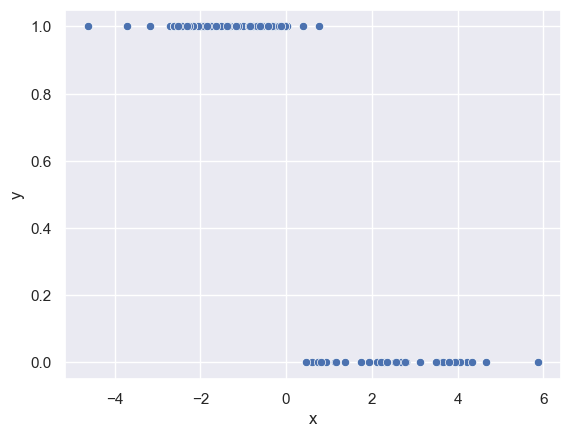

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X, y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
scaler = StandardScaler()
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(scaler.fit_transform(X_train), y_train)
X_test_lda = lda.transform(scaler.transform(X_test))
sns.scatterplot(pd.DataFrame({'x': X_test_lda[:, 0], 'y': y_test}), x='x', y='y');

We could use Linear Regression to predict the target

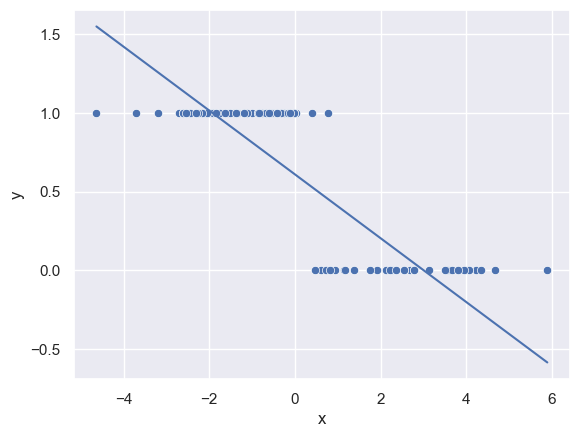

In [17]:
reg = LinearRegression().fit(X_train_lda, y_train)
y_pred = reg.predict(X_test_lda)
sns.scatterplot(pd.DataFrame({'x': X_test_lda[:, 0], 'y': y_test}), x='x', y='y')
sns.lineplot(pd.DataFrame({'x': X_test_lda[:, 0], 'y': y_pred}), x='x', y='y');

In [18]:
((y_pred >= 0.5)  ==  y_test).mean()

0.9824561403508771

Although it looks weird, we can simply apply a decision rule for the final prediction: 
$$\hat y_i=\begin{cases}
      1, & \text{if}\ x_i^\top\hat\beta\geq0.5 \\
      0, & \text{if}\ x_i^\top\hat\beta<0.5
    \end{cases}$$

However using Logistic Regression, we can take advantage of the logistic function, which gives us a sigmoid curve smoothly ranging from 0 to 1, which yields a probability that the target is 1. That can be very valuable for classification.

$$\hat p_i = \mathbb P[\hat y_i = 1|x_i] = \frac{1}{1 + e^{-x_i^\top\hat\beta}}$$

This is done by minimizing the log loss with respect to $\beta$

$$\hat\beta = \text{arg min}_\hat\beta = \left(-y_i \log \hat p_i - (1 - y_i)\log (1 - \hat p_i)\right)$$

A little algebraic manipulation, gets us the logit function (log of the odds ratio) that is a linear function of $X$

$$logit(\hat p_i) = \log\left(\frac{\hat p_i}{1 - \hat p_i}\right) = x_i^\top \hat\beta$$

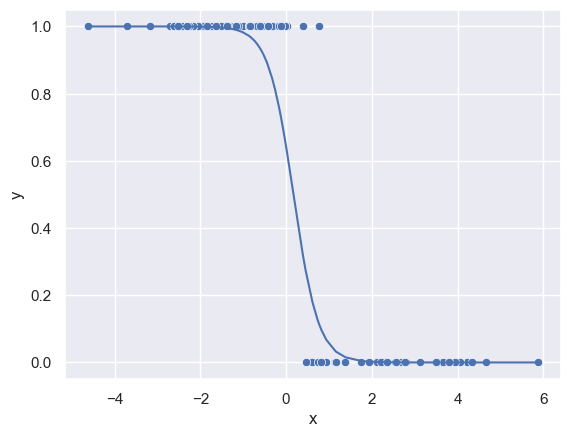

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)
y_pred = clf.predict_proba(X_test_lda)[:, 1]
sns.scatterplot(pd.DataFrame({'x': X_test_lda[:, 0], 'y': y_test}), x='x', y='y')
sns.lineplot(pd.DataFrame({'x': X_test_lda[:, 0], 'y': y_pred}), x='x', y='y');

In [21]:
clf.score(X_test_lda, y_test)

0.9824561403508771

## Gradient Descent
- Gradient Descent is an EXTREMELY important algorithm used to fit a model to data
- It does this by computing the gradient of a loss function, with respect to learnable parameters
- It then uses that to iteratively step along the loss function in hopes of converging on the global minimum

### Loss Function
- A loss function is a function that measures how badly a model fits the data
- The greater the loss function, the worse the model
- We want to minimize the value of this function by changing parameters
- The choice of this function can have major impacts on your model's performance
- One common function for regression problems is RSS
- For binary classification, binary cross entropy or logloss are common as well

### Gradients

- A gradient is a vector of partial derivatives
- At the global minimum of a function, it's gradient should be a vector of 0's
- However, if there are local minima, the gradient will be all zeros there as well, that is a problem we might need to strategize for
- In our case, we compute the gradient with respect to LEARNABLE PARAMETERS, all other "variables" are treated as constants

### Gradient Example

- $RSS = \| X\beta - y\|^2_2 = \sum_i \left(x_i^\top \beta - y_i \right)^2 $
- $\nabla RSS = \sum_i 2x_i\left(x_i^\top \beta - y_i \right)$


### Gradient Descent Steps
1. Initialize value of parameters
2. Compute gradient of Loss function with respect to those parameters for those parameter values
3. Decrement the value of betas by the product of the gradient and the learning rate

Let's look at a Linear Regression case with 1 feature that is centered so we only have to predict a single parameter (no constant parameter)

Text(0, 0.5, 'y')

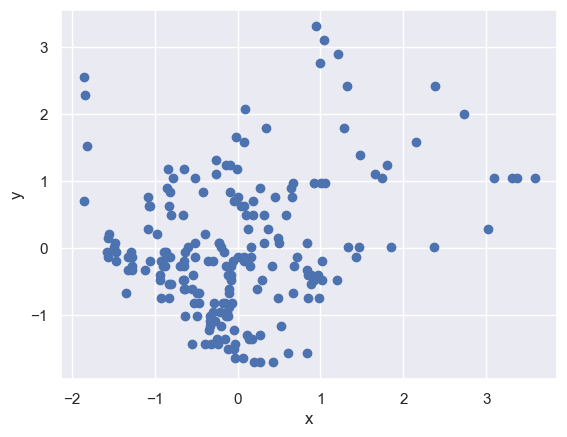

In [6]:
from sklearn.decomposition import PCA
df = pd.DataFrame(datasets.macrodata.load().data)
x, y = df[['tbilrate']], df[['unemp']]
x, y = StandardScaler().fit_transform(x), StandardScaler().fit_transform(y)[:,0]
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

In [7]:
LinearRegression(fit_intercept = False).fit(x, y).coef_[0]

0.2299689971007087

Text(0, 0.5, 'RSS')

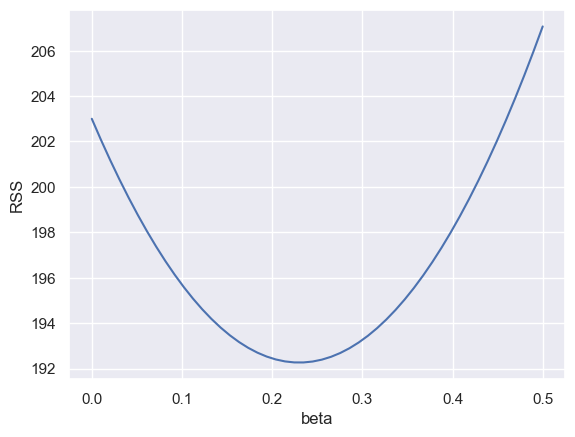

In [8]:
betas = np.linspace(0, 0.5, 50)
rss = ((betas.reshape(-1, 1) @ x.T - y)**2).sum(axis = 1)
plt.plot(betas, rss)
plt.xlabel('beta')
plt.ylabel('RSS')

beta=0.2314456488329987


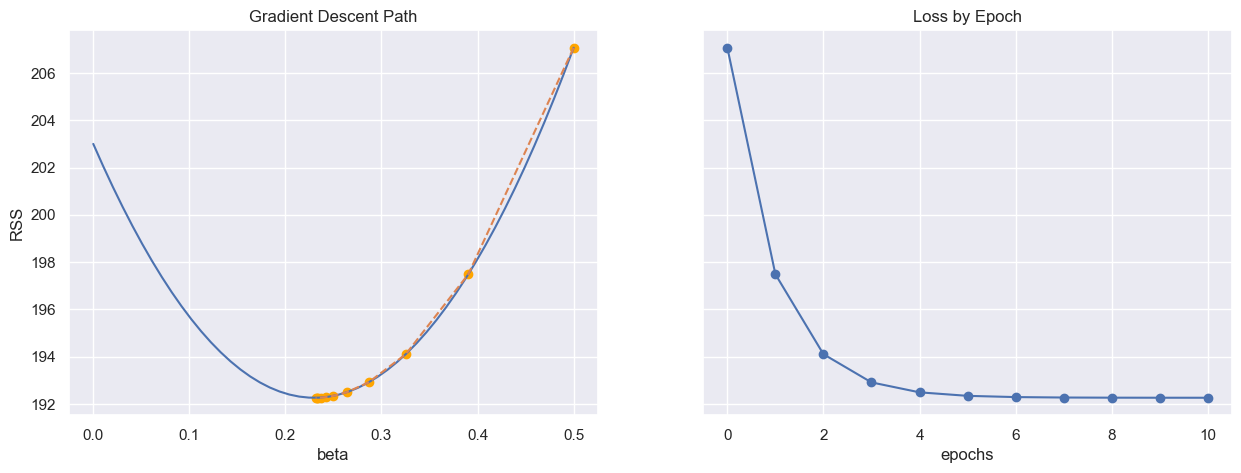

In [23]:
lr = 0.001
max_epochs = 10

beta = 0.5
bs, ls = [beta], [(([beta] @ x.T - y)**2).sum()]
for _ in range(max_epochs):
    grad = (2 * x.reshape(-1) * (beta * x.T - y)).sum(axis = 1)
    beta -= lr * grad[0]
    bs.append(beta)
    ls.append((([beta] @ x.T - y)**2).sum())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 5], sharey = True)
ax1.plot(betas, rss)
ax1.scatter(bs, ls, color ="orange")
ax1.plot(bs, ls, linestyle = "dashed")
ax1.set(xlabel='beta', ylabel='RSS', title= 'Gradient Descent Path')
ax2.plot(np.arange(len(ls)), ls)
ax2.scatter(np.arange(len(ls)), ls)
ax2.set(xlabel = 'epochs', title = 'Loss by Epoch')
print(f"beta={beta}")